# Import the libraries needed

In [1]:
import pandas as pd

# Reading csv file and saving it

In [2]:
schools = pd.read_csv("schools.csv")

# Preview the header and columns

In [3]:
print(schools.head())
print(schools.columns)

                                         school_name    borough building_code  \
0  New Explorations into Science, Technology and ...  Manhattan          M022   
1                               Essex Street Academy  Manhattan          M445   
2                       Lower Manhattan Arts Academy  Manhattan          M445   
3    High School for Dual Language and Asian Studies  Manhattan          M445   
4      Henry Street School for International Studies  Manhattan          M056   

   average_math  average_reading  average_writing  percent_tested  
0           657              601              601             NaN  
1           395              411              387            78.9  
2           418              428              415            65.1  
3           613              453              463            95.9  
4           410              406              381            59.7  
Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writ

# Data Cleaning

In [4]:
#fill null values with default
schools.fillna(0,inplace=True)

#check for null
print(schools.isnull().sum())

school_name        0
borough            0
building_code      0
average_math       0
average_reading    0
average_writing    0
percent_tested     0
dtype: int64


# Questions to be answered
1. Which NYC schools have the best math results?
2. What are the top 10 performing schools based on the combined SAT scores?
3. Which single borough has the largest standard deviation in the combined SAT score?

# 1. Which NYC schools have the best math results?

The best math results are at least 80% of the *maximum possible score of 800* for math.
Save your results in a pandas DataFrame called <b>best_math_schools</b>, including "school_name" and "average_math" columns, sorted by "average_math" in descending order.

In [5]:
maths_threshold = 800*0.8
best_math_schools = schools[schools['average_math']>=maths_threshold][['school_name','average_math']].sort_values("average_math",ascending=False)
print(best_math_schools)

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


# 2. What are the top 10 performing schools based on the combined SAT scores?

Save your results as a pandas DataFrame called top_10_schools containing the "school_name" and a new column named "total_SAT", with results ordered by "total_SAT" in descending order ("total_SAT" being the sum of math, reading, and writing scores).

In [6]:
schools['total_SAT']=schools['average_math']+schools['average_reading']+schools['average_writing']
top_10_schools = schools[['school_name','total_SAT']].sort_values('total_SAT',ascending=False).head(10)
print(top_10_schools)

                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


# 3. Which single borough has the largest standard deviation in the combined SAT score?

Save your results as a pandas DataFrame called largest_std_dev.
The DataFrame should contain one row, with:
* "borough" - the name of the NYC borough with the largest standard deviation of "total_SAT".
* "num_schools" - the number of schools in the borough.
* "average_SAT" - the mean of "total_SAT".
* "std_SAT" - the standard deviation of "total_SAT".

Round all numeric values to two decimal places.

In [7]:
# Group by borough and calculate standard deviation for total_SAT
std_by_borough = schools.groupby('borough')['total_SAT'].std()

# Find the borough with the maximum standard deviation
max_std_borough = std_by_borough.idxmax()


#number of school in max borough
num_schools = schools[schools['borough']==max_std_borough]['school_name'].count()

#average SAT 
average_SAT = schools[schools['borough']==max_std_borough]['total_SAT'].mean()
#std_SAT
std_SAT = std_by_borough.max()


#create dataframe from calcualted values
largest_std_dev = pd.DataFrame({
    'borough': [max_std_borough],
    'num_schools': [num_schools],
    'average_SAT': [round(average_SAT, 2)],
    'std_SAT': [round(std_SAT, 2)]
})

print(largest_std_dev)


     borough  num_schools  average_SAT  std_SAT
0  Manhattan           89      1340.13   230.29


# Visualization

Visualization of questions solved above using <b>matplotlib</b>



## import matplotlib and seaborn library

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

## Creating a horizontal bar graph for <b>NYC schools have the best math results?</b>

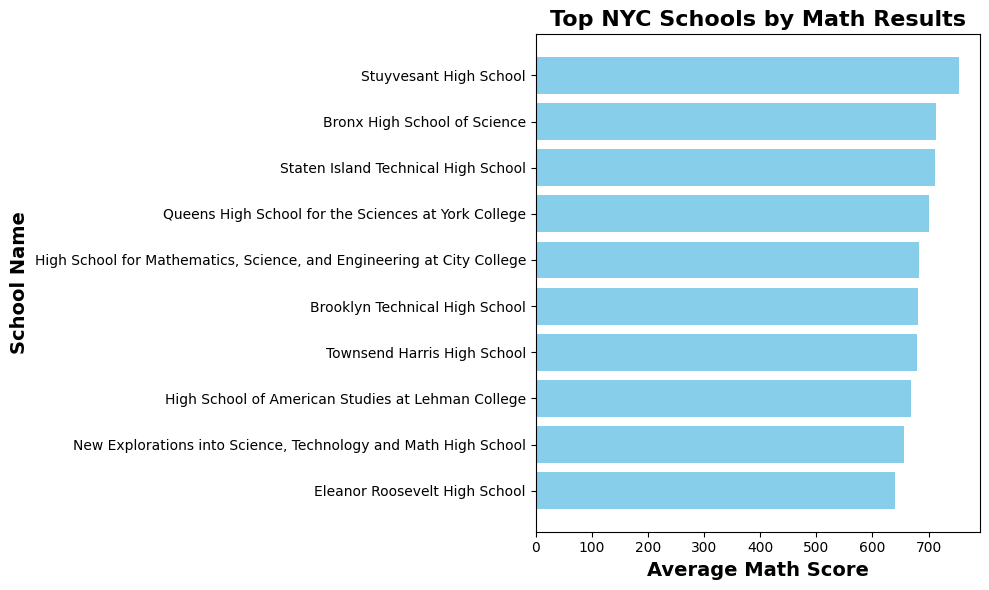

In [9]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(best_math_schools['school_name'], best_math_schools['average_math'], color='skyblue')

# Add labels and title
plt.xlabel('Average Math Score', fontsize=14, fontweight='bold')
plt.ylabel('School Name', fontsize=14, fontweight='bold')
plt.title('Top NYC Schools by Math Results', fontsize=16, fontweight='bold')

# Invert the y-axis to have the highest score at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


## Creating horizontal bar graph for <b>top 10 performing schools based on the combined SAT scores</b>

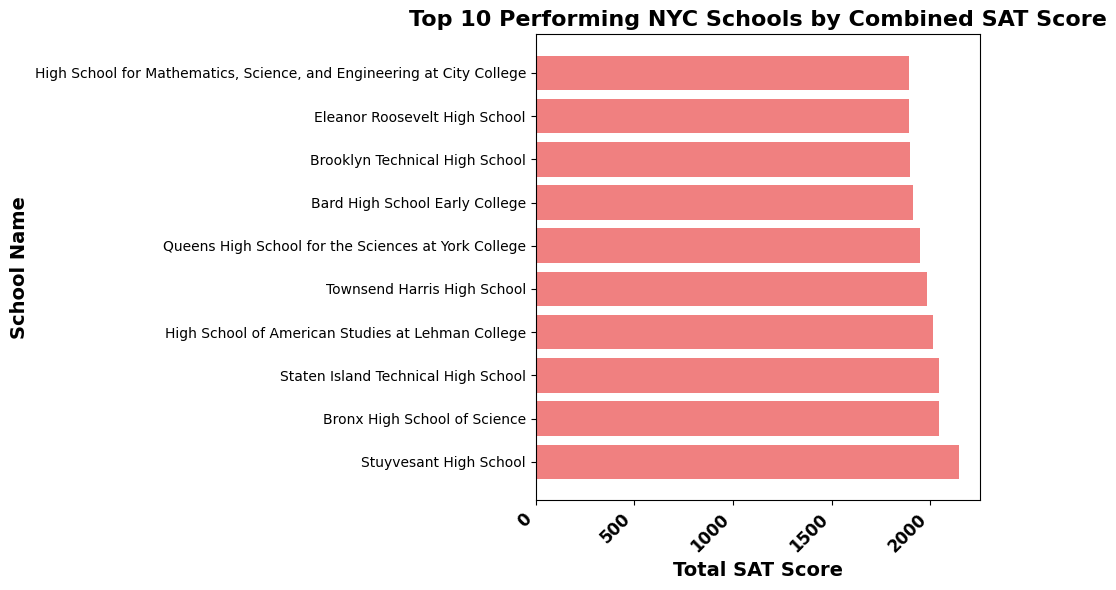

In [10]:
# Horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_schools['school_name'], top_10_schools['total_SAT'], color='lightcoral')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')

# Add labels and title with bold and bigger text
plt.xlabel('Total SAT Score', fontsize=14, fontweight='bold')
plt.ylabel('School Name', fontsize=14, fontweight='bold')
plt.title('Top 10 Performing NYC Schools by Combined SAT Score', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


## Creating Scatterplot to visualize the <b>total SAT scores of each school in each borough</b>

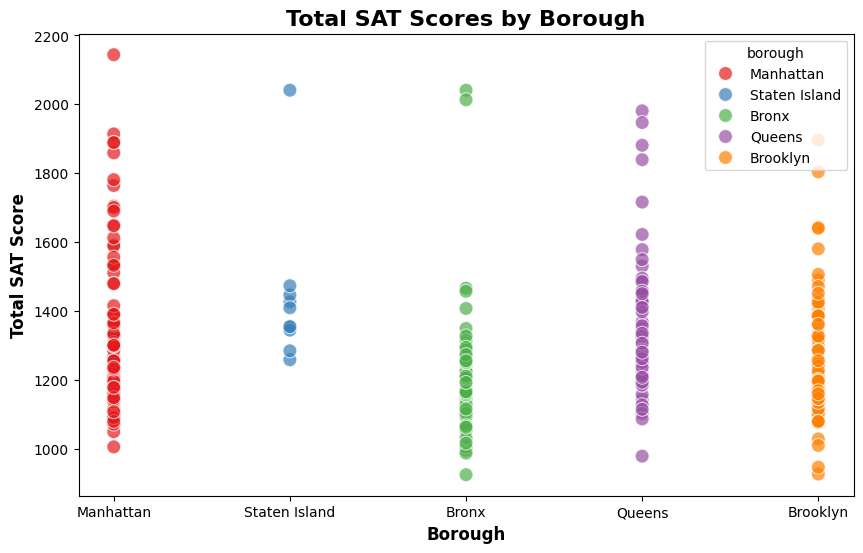

In [12]:
# Scatter plot of total SAT scores by borough
plt.figure(figsize=(10, 6))
sns.scatterplot(x='borough', y='total_SAT', data=schools, hue='borough', palette='Set1', s=100, alpha=0.7)

# Add labels and title
plt.title('Total SAT Scores by Borough', fontsize=16, fontweight='bold')
plt.xlabel('Borough', fontsize=12, fontweight='bold')
plt.ylabel('Total SAT Score', fontsize=12, fontweight='bold')

plt.show()
